# Week1 - Predictive Analytics project
## K Nearest Neighbour on Breast Cancer
### Chetan Kulkarni

### Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign) 

3) Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)

    b) texture (standard deviation of gray-scale values)

    c) perimeter

    d) area

    e) smoothness (local variation in radius lengths)

    f) compactness (perimeter^2 / area - 1.0)

    g) concavity (severity of concave portions of the contour)

    h) concave points (number of concave portions of the contour)

    i) symmetry
    
    j) fractal dimension ("coastline approximation" - 1)



### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import neighbors, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

### Load the data 

In [2]:
data = pd.read_csv("/Users/chetankulkarni/Documents/Python/Breast_Cancer.csv", header = 0)

In [429]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Checking for the null values

In [430]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

As we can see the Unnamed 32 data has 569 null values, these can be removed. 

### Data cleaning and prepartion

Let us first remove the Unnamed: 32 column

In [431]:
data.drop("Unnamed: 32", axis =1, inplace=True)

In [432]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### Let us check for any outliers

In [433]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


From the above describe we can see that all the data are in sync and they don't seem to have any outliers.

Let us first drop the ID column, as it is not useful in any of the diagnosis

In [434]:
data.drop('id',axis=1,inplace=True)

In [435]:
data.shape

(569, 31)

So after dropping ID and unnamed 32, now we have 31 columns and 569 rows

Let us check for our target variable, we can check this by checking the variance of the variables.

In [436]:
data.diagnosis.head(10)
data.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

Based on the above data we can see that diagnosis has 2 values so that is our target variable

In [437]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [438]:
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploratory Data Analysis

Let us go ahead with the exploratory data analysis as  we are done with data cleaning. 

### Countplot

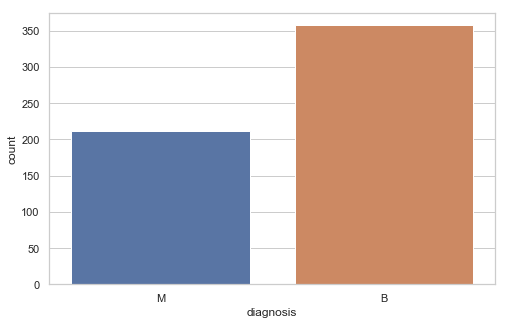

In [439]:
# plotting the benign and malignant cells
sns.countplot(data['diagnosis'],label="Count")

In [440]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [441]:
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### K Nearest Neighbor - Machine Learning Model

During supervised learning:

Our primary task T would be to distinguish Malign and benign count of Breast cancer victim and predict Malign/benign breast cancer victims. Our performance P would be measured by accuracy, f1-score Our experience E would be gained using the training data set.

#### Lazy Learner - K-Nearest Neighbor Model 

Introduction: K Nearest Neighbors - Classification

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique.

Different disciplines in KNN

1) Lazy Learning: No learning of the model is required and all of the work happens at the time a prediction is requested. As such, KNN is often referred to as a lazy learning algorithm.

2) Instance-Based Learning: The raw training instances are used to make predictions. As such KNN is often referred to as instance-based learning or a case-based learning (where each training instance is a case from the problem domain).

3) Non-Parametric: KNN makes no assumptions about the functional form of the problem being solved. As such KNN is referred to as a non-parametric machine learning algorithm.


### Load Features and Targets
Now we will create the input features X and output feature Y from the dataset

In [442]:
X = data.drop('diagnosis',axis=1)
y = data['diagnosis']

### Split Train and Test Sets

We performed a Test-train split. Splitting our training and test data into a 70-30 (Train-Test) ratio.

In [443]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Transform Feature Values

In [444]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

### Fit Model
Building KNN algorithm and applying it on the test data. Here we have specified three parameters n_neighbors=5. This implies that we will take vore from 5 nearest neighbors for feature similarity.

In [445]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

From Above classifier we can understand :

1) Here we have specified three parameters n_neighbors=5. This implies that we will take vore from 5 nearest neighbors for feature similarity.

2) Distance between the new point and the point in the dataset will be calculated using minkowski and p=2, so the distance is euclidean distance.



### Predict Metrics
Now that we have trained the dataset, we will fit our test set

In [446]:
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("KNN accuracy score is", knn.score(X_test, y_test))

[[109   2]
 [  5  55]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       111
           1       0.96      0.92      0.94        60

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171

KNN accuracy score is 0.9473684210526315


Seeing the above diagram we can say

True Positives (TP): We tested for Positive (Will Have) & they actual have the cancer.

True Negatives (TN): We tested for Negative (Will Not Have) & they actual don’t have the cancer.

False Positives (FP): We tested for Positive (Will Have) & they actual don’t have the cancer. (Also known as a “Type I error.”)

False Negatives (FN): We tested for Negative (Will Not Have) & they actual have the cancer. (Also known as a “Type II error.”)

### Finding the Optimal K

Before Fitting the Model, we have to check the optimal value for K, we can do this by using crossvalidation approach.

In [447]:
kval = range(1, 20)
scores = []
for i in kval:   # running for different K values to know which yields the max accuracy. 
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    scores.append(score.mean())
mse = [1-x for x in scores]

## Plot Result

Text(0, 0.5, 'Mean Error')

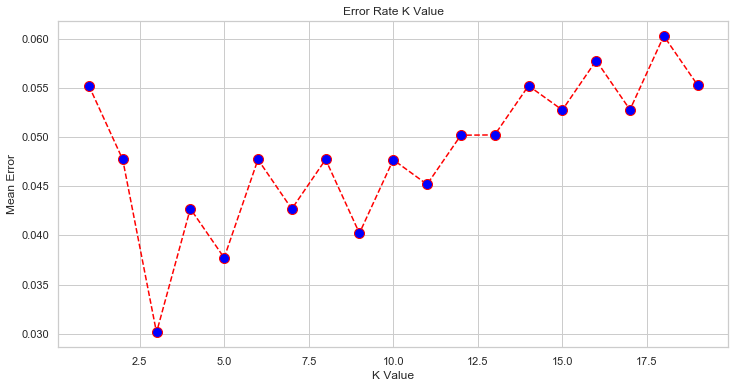

In [404]:
plt.figure(figsize=(12, 6))  
plt.plot(kval, mse, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

The plot shows the training set accuracy on the y-axis for Mean error against the setting of n_neighbors on the x-axis (K values). Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex.

The best performance is somewhere around three neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is more than 90% accuracy, which might still be pretty good.

The above plot suggests that we should shoose n_neighbors=3. 


### Fit Model for the Optimal K

Building KNN algorithm and applying it on the test data. Here we have specified three parameters n_neighbors=3. This implies that we will take vore from 5 nearest neighbors for feature similarity.

In [448]:
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### Predict Metric

In [449]:
y_pred = classifier.predict(X_test)  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       111
           1       0.98      0.90      0.94        60

   micro avg       0.96      0.96      0.96       171
   macro avg       0.97      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



F-1 score: It computes the weighted average of precision and recall. A score closer to 1 is considered as good and 0 as bad. Here the f1-score is 96%

### Estimate the accuracy of the classifier on future data, using the test data

In [452]:
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.96


### Confusion Matrix

As shown below, the confusion matrix has true positives and False positives as 110 and 54 respectively that means it has predicted 110 times correctly that person will get cancer and 54 times that person will not get breast cancer

Here, 6 is true negative which means that person was predicted that he has cancer but he does not have and 1 is false negative that means person is not predicted of cancer but the person actually got cancer. 

Here, in cases of medical conditions like cancer FN( false negative) are riskier than TN(true negatives). Hence the KNN model is pretty accurate here.


In [451]:
print(confusion_matrix(y_test, y_pred))

[[110   1]
 [  6  54]]


## Conculsion:

The best values hyperparameter for KNN algorithm for predicting the best cancer is 3.


#### Pros of K Nearest Neighbors
1) Simple algorithm and hence easy to interpret the prediction

2) Non parametric, so makes no assumption about the underlying data pattern 

3) Used for both classification and Regression

4) Training step is much faster for nearest neighbor compared to other machine learning algorithms

#### Cons of K Nearest Neighbors

1) KNN is computationally expensive as it searches the nearest neighbors for the new point at the prediction stage

2) High memory requirement as KNN has to store all the data points

3) Prediction stage is very costly

4) Sensitive to outliers, accuracy is impacted by noise or irrelevant data.